# Linear Regression

In this section, we are using linear regression to check and compare our MSE values for subsequent machine learning techniques that we are going to explore. 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set()
import re

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Importing the cleaned data set

In [2]:
laptop_data_clean = pd.read_csv('./laptop_data_clean.csv', encoding='latin-1')
laptop_data_clean.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,2103.31
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1411.34
2,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,902.75
3,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3983.80
4,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2831.65


# Encoding the features

In [3]:
## from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
laptop_data_clean['Company'] = le.fit_transform(laptop_data_clean['Company'])
laptop_data_clean['Product'] = le.fit_transform(laptop_data_clean['Product'])
laptop_data_clean['TypeName'] = le.fit_transform(laptop_data_clean['TypeName'])
# laptop_data_clean['Inches'] = le.fit_transform(laptop_data_clean['Inches'])
laptop_data_clean['ScreenResolution'] = le.fit_transform(laptop_data_clean['ScreenResolution'])
# laptop_data_clean['Ram'] = le.fit_transform(laptop_data_clean['Ram'])
laptop_data_clean['Memory'] = le.fit_transform(laptop_data_clean['Memory'])
laptop_data_clean['Cpu'] = le.fit_transform(laptop_data_clean['Cpu'])
laptop_data_clean['Gpu'] = le.fit_transform(laptop_data_clean['Gpu'])
laptop_data_clean['OpSys'] = le.fit_transform(laptop_data_clean['OpSys'])
# laptop_data_clean['Weight'] = le.fit_transform(laptop_data_clean['Weight'])
# laptop_data_clean['Price_euros'] = le.fit_transform(laptop_data_clean['Price_euros'])
laptop_data_clean

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_sgd
0,1,297,4,13.3,10,2,8,4,58,8,1.37,2103.31
1,1,298,4,13.3,1,2,8,2,51,8,1.34,1411.34
2,7,50,3,15.6,3,2,8,16,53,4,1.86,902.75
3,1,297,4,15.4,12,3,16,29,9,8,1.83,3983.80
4,1,297,4,13.3,10,2,8,16,59,8,1.37,2831.65
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,555,0,14.0,3,3,4,4,47,5,1.80,1001.66
1299,10,563,0,13.3,13,3,16,29,47,5,1.30,2353.43
1300,10,193,3,14.0,0,4,2,35,40,5,1.50,359.53
1301,7,2,3,15.6,0,3,6,10,21,5,2.19,1199.48


Model for 4 selected predictors vs Price:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6367994754122226
Mean Squared Error (MSE) 	: 455288.75535685295

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6364100651018645
Mean Squared Error (MSE) 	: 363732.3930602962



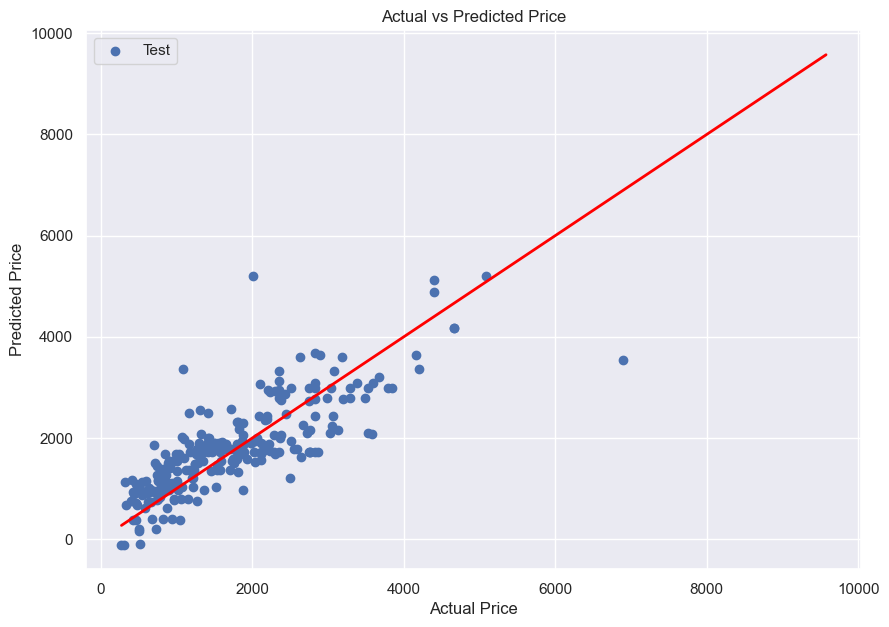

Predicted price for 2nd row:  2372.57
Actual price:  [2009.74341259]

Model for all predictors vs Price:
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.652930707833099
Mean Squared Error (MSE) 	: 402436.4753695004

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6918306721730059
Mean Squared Error (MSE) 	: 423440.0038567224



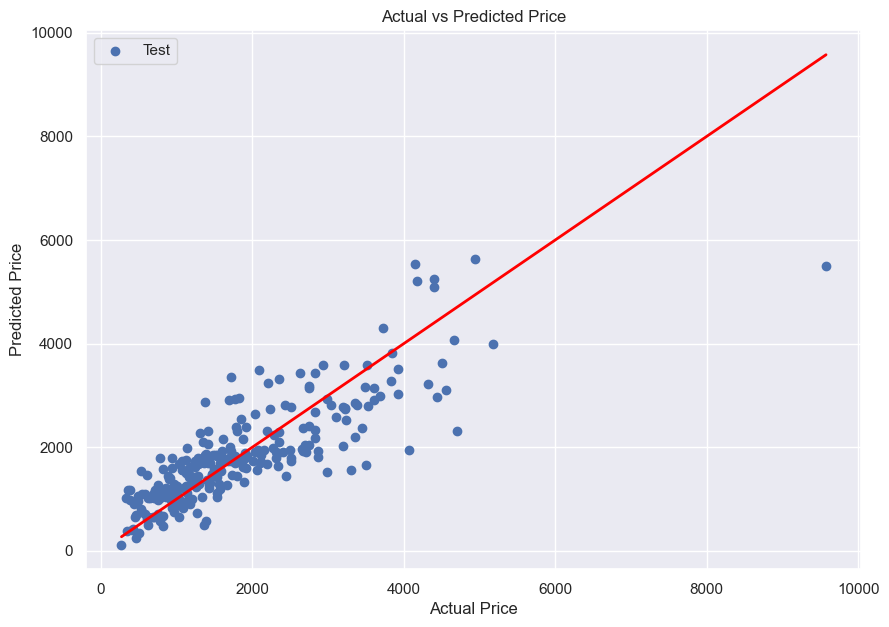

Predicted price for 2nd row:  1001.66
Actual price:  [1099.77222785]



In [5]:
from sklearn.linear_model import LinearRegression

def linear_regression(predictors, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model
    
    # # Coefficients of the Linear Regression line
    # print('Intercept of Regression \t: b = ', linreg.intercept_)
    # print('Coefficients of Regression \t: a = ', linreg.coef_)
    # print()
    
    # # Print the Coefficients against Predictors
    # print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
    # print()
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    plt.figure(figsize=(10, 7))
    plt.scatter(y_test, y_test_pred, label='Test')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2) # Diagonal line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.legend()
    plt.show()
    
    print("Predicted price for 2nd row: ", y_test.iloc[0, 0])
    print("Actual price: ", y_test_pred[0])

# Extract Response and Predictors
y = pd.DataFrame(laptop_data_clean["Price_sgd"])
X = pd.DataFrame(laptop_data_clean[["ScreenResolution", "Gpu", "Ram", "OpSys"]])
X_all = pd.DataFrame(laptop_data_clean[["ScreenResolution", "Gpu", "Ram", "OpSys", "Company" ,"Product", "TypeName", "Inches", "Cpu", "Memory", "Weight"]])

print("Model for 4 selected predictors vs Price:")
linear_regression(X,y)
print()

print("Model for all predictors vs Price:")
linear_regression(X_all,y)
print()